# Import packages

First, we need to import the necessary packages.

In [1]:
import matplotlib.pyplot as plt # Plot data
from sklearn import model_selection, linear_model # Machine learning package
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np # Allows to work with arrays (vectors and matrix)
import pandas as pd # Import, preprocess and visualize data
import seaborn as sns # For now it only makes matplotlib plots more appealing
sns.set()

# Import dataset

In [2]:
data = pd.read_csv("Real_estate.csv")

## Visualize first rows of dataset

It is important to study de data before start working with it. We can visualize the first rows of the dataset with the following command and also see which title each column has.

In [3]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


It shows some statistics of each column.
We will later talk about outliers and missing values. In this part we can visualize them.
For example, one way to detect skewed data is to look at the mean and the 50% percentile. If the two values are close, it means that the distribution is centered and not right or left skewed.

In [4]:
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


## Cleaning the data

Sometimes we will not need al the columns to perform linear regression.

In [5]:
clean_data = data.drop(["No"], axis=1) # Delete the column tagged "No"
clean_data

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


## Save the features in an object

In [6]:
columns = clean_data.columns
columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

## Plot each feature agains the variable of interest

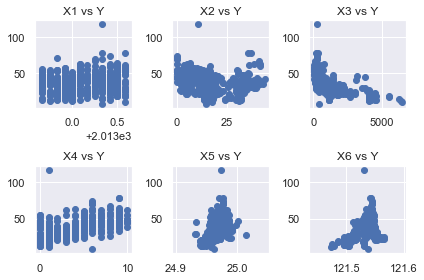

In [7]:
plt.figure()

plt.subplot(231)
plt.scatter(clean_data["X1 transaction date"], clean_data["Y house price of unit area"])
plt.title("X1 vs Y")

plt.subplot(232)
plt.scatter(clean_data["X2 house age"], clean_data["Y house price of unit area"])
plt.title("X2 vs Y")

plt.subplot(233)
plt.scatter(clean_data["X3 distance to the nearest MRT station"], clean_data["Y house price of unit area"])
plt.title("X3 vs Y")

plt.subplot(234)
plt.scatter(clean_data["X4 number of convenience stores"], clean_data["Y house price of unit area"])
plt.title("X4 vs Y")

plt.subplot(235)
plt.scatter(clean_data["X5 latitude"], clean_data["Y house price of unit area"])
plt.title("X5 vs Y")

plt.subplot(236)
plt.scatter(clean_data["X6 longitude"], clean_data["Y house price of unit area"])
plt.title("X6 vs Y")

plt.tight_layout()

## Correlation matrix

Ploting a correlation matrix is sometimes useful to see if the features are independent from each other and if there is a strong correlation between some feature and the value we want to predict.

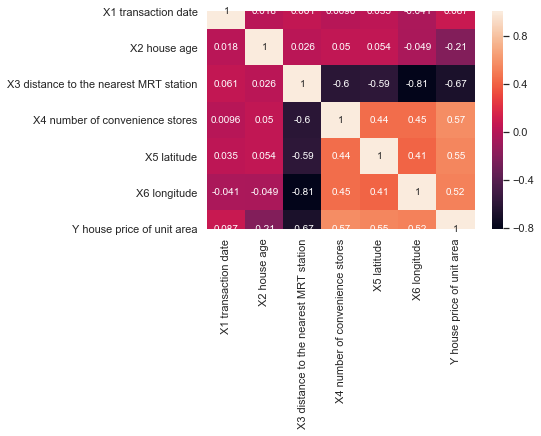

In [8]:
corrMatrix = clean_data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In this correlation matrix we can see that the features X3, X4 and X5 seem to have a strong correlation with Y. We will later see if this is true or not.

# Prepare the data for linear regression

In machine learning X is the matrix with all the features.
And y the outputs.

In [11]:
X = clean_data.drop(["Y house price of unit area"], axis = 1)

In [12]:
y = clean_data["Y house price of unit area"]

## Test and train splitting

Machine learning algorithms learn through experience. They repeat a task and adjust its behaviour until they are good at it. Learning on the same data over and over again can make them memorize the data and don't perform well when working on unseen data. This is why we split the data in two groups, the Train set and the Test set.
The **train set** is the data we will use to adjust the coefficients of the model.
The **test set** is the data we will use to evaluate if the model is accurate or not.

In [13]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=42)

# Feature scaling

In the last post we already discussed why it is important to scale the data beforehand.

In [14]:
mean = np.mean(X_train, axis=0)
mean

X1 transaction date                       2013.162916
X2 house age                                17.149677
X3 distance to the nearest MRT station    1055.451988
X4 number of convenience stores              4.122581
X5 latitude                                 24.969494
X6 longitude                               121.533927
dtype: float64

In [15]:
sd = np.std(X_train, axis=0)
sd

X1 transaction date                          0.282747
X2 house age                                11.291486
X3 distance to the nearest MRT station    1234.076012
X4 number of convenience stores              2.981308
X5 latitude                                  0.012502
X6 longitude                                 0.015019
dtype: float64

In [16]:
X_train_scaled = (X_train - mean) / sd
X_train_scaled.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
326,1.192175,-1.155709,-0.809494,0.965153,-0.964124,0.211900
410,-1.753922,-1.022866,-0.781958,1.636000,0.386819,0.610720
391,1.485724,-0.969729,0.716566,-1.047386,-1.435234,1.327799
352,-1.166825,0.110731,1.312325,-0.376540,-0.644984,-1.708299
132,0.014444,0.836942,-0.464067,0.294307,0.386819,0.313103


#### Note: mean of X_train_scaled is zero. The exponents are high and negative

In [17]:
np.mean(X_train_scaled, axis = 0)

X1 transaction date                      -8.715722e-13
X2 house age                              7.291658e-16
X3 distance to the nearest MRT station   -5.017492e-16
X4 number of convenience stores          -1.346593e-16
X5 latitude                               1.368561e-12
X6 longitude                             -1.913721e-12
dtype: float64

#### Note: standard deviation is one as we wanted.

In [18]:
np.std(X_train_scaled, axis=0)

X1 transaction date                       1.0
X2 house age                              1.0
X3 distance to the nearest MRT station    1.0
X4 number of convenience stores           1.0
X5 latitude                               1.0
X6 longitude                              1.0
dtype: float64

# Linear Regression using gradient descent

In [28]:
# Initialize weights at random values
theta = np.random.rand(7,1)

# Save number of training examples and features
m, n = X_train.shape

# Add column of 1's for intercept coefficient
X_trainn = np.array(X_train_scaled)
X_trainn = np.insert(X_trainn, 0, 1, axis=1)

# Convert from dataframe to array to operate
y_train = np.array(y_train)
# Reshape to a 2D array to operate
y_train = y_train.reshape(y_train.shape[0],1)

# Initialize values for the loop
previous = 0
reduction = 1

def cost_function(theta, X, y):
    ho = X.dot(theta)
    addition = sum((ho-y) ** 2)
    cf = (1/(m)) * addition
    return cf, ho

while(abs(reduction) > 0.0001): # Stops when the change in cf is less than 0.01%
    
    # Compute cost function
    cf, ho = cost_function(theta, X_trainn, y_train)

    # Compute gradients
    lr = 0.005 # Learning rate
    
    grad_0 =  (2/m) * sum(ho-y_train)
    addition_j = (2/m) * sum((ho-y_train)*X_trainn)
    grad_j = np.delete(addition_j, 0, axis = 0)
    grad = np.concatenate((grad_0, grad_j), axis = 0)
    grad = grad.reshape(grad.shape[0],1)

    # Update coefficient values
    theta = theta - lr*grad
    
    # Check convergence
    reduction = (cf - previous) / cf
    previous = cf

print("Cost function: ", cf)
print("Coefficients: ", theta)

Cost function:  [82.0544871]
Coefficients:  [[38.25339919]
 [ 1.56904325]
 [-2.94313866]
 [-4.42480524]
 [ 3.67671657]
 [ 3.07534062]
 [ 0.72353126]]


## Predict on test set

In [33]:
X_test_scaled = (X_test - mean) / sd # Scale the test set
m, n = X_test_scaled.shape # Save test set number of examples and features

# Add 1's for the intercept term
X_testt = np.array(X_test_scaled)
X_testt = np.insert(X_testt, 0, 1, axis=1)

# Reshape test vector into a 2D array
y_test = np.array(y_test)
y_test = y_test.reshape(y_test.shape[0],1)

# Evaluate cost function
cf, y_pred = cost_function(theta, X_testt, y_test)
print("Mean squared error: %.2f" % cf)

# Alternatively we can use the built-in function in sklearn
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

Mean squared error: 64.29
Mean squared error: 64.29


# Linear Regression using Sklearn

In [34]:
# Create linear regression object
LR = linear_model.LinearRegression()

# Train the model using the training sets
LR.fit(X_train_scaled, y_train)

# Make predictions using the testing set
y_pred = LR.predict(X_test_scaled)

# The coefficients
print('Coefficients: \n', LR.coef_)

# Intercept term
print('Intercept term:', LR.intercept_)

Coefficients: 
 [[ 1.6639104  -3.01253389 -6.15517885  3.36387387  2.74308113 -0.64780363]]
Intercept term: [38.75032258]


In [35]:
predictions = {"Predicted value": y_pred[:,0], "Test value": y_test[:,0]}

pred = pd.DataFrame(predictions, columns = ['Predicted value', 'Test value'])
pred

,Predicted value,Test value
0,48.342915,45.1
1,41.542989,42.3
2,44.537946,52.2
3,40.484093,37.3
4,27.670334,22.8
...,...,...
99,48.064912,55.0
100,30.155356,24.4
101,33.976413,28.5
102,43.912803,7.6


In [37]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Mean squared error: 66.67
Coefficient of determination: 0.58


# Lasso regression 

Now that we have proved that the Sk-learn kit is useful and easy to use we will create the regression models using it.
This package allows us to create a model with fewer lines and less time.

In [48]:
Lassoreg = linear_model.Lasso(alpha=0.1) # apha is the regularization constant

# Train the model using the training sets
Lassoreg.fit(X_train_scaled, y_train)

# Make predictions using the testing set
y_pred = Lassoreg.predict(X_test_scaled)

# The coefficients
print('Coefficients: \n', Lassoreg.coef_)

# Intercept term
print('Intercept term:', Lassoreg.intercept_)

Coefficients: 
 [ 1.5463606  -2.89252874 -5.70099965  3.32774327  2.72517205 -0.16273881]
Intercept term: [38.75032258]


In [49]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Mean squared error: 65.89
Coefficient of determination: 0.58


# Ridge regression 

In [52]:
Ridgereg = linear_model.Ridge(alpha=0.5) # apha is the regularization constant

# Train the model using the training sets
Ridgereg.fit(X_train_scaled, y_train)

# Make predictions using the testing set
y_pred = Ridgereg.predict(X_test_scaled)

# The coefficients
print('Coefficients: \n', Ridgereg.coef_)

# Intercept term
print('Intercept term:', Ridgereg.intercept_)

Coefficients: 
 [[ 1.65970782 -3.00740889 -6.12259467  3.36544541  2.74672262 -0.62297614]]
Intercept term: [38.75032258]


In [53]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Mean squared error: 66.62
Coefficient of determination: 0.58
